## Gradient Descent Fractal

Gradient Descent is used to find minima of a given equation $f(z)$ \
Find $z$ such that $f'(z)=0$ and $f''(z) \geq 0$  \
$ z_{n+1} = z_{n} - \lambda f'(z_n) $
\
\
Gradient Ascent is used to find maxima of a given equation $f(z)$ \
Find $z$ such that $f'(z)=0$ and $f''(z) \leq 0$  \
$ z_{n+1} = z_{n} + \lambda f'(z_n) $
\
\
To find extrema of a given equation $f(z)$ \
Find $z$ such that $f'(z)=0$\
$ z_{n+1} = z_{n} - \frac{f'(z_n)}{f''(z_n)} $  \
Which is essentially Newton's method for $f'(z)$
\
\
More information can be found here:
- https://en.wikipedia.org/wiki/Gradient_descent

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

### define function and parameters

plot of df


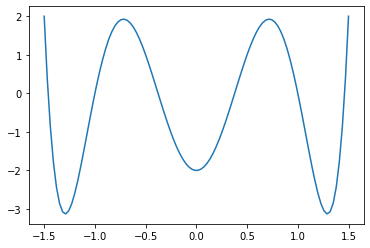

df
       6             5         4             3         2
6.578 x - 3.936e-15 x - 21.56 x + 9.548e-15 x + 16.98 x + 3.146e-15 x - 2
roots of df
[-1.461022    1.461022   -1.          1.         -0.37741455  0.37741455]
minima of df
[1.461022, -1.0, 0.37741455]


In [2]:
# Ant fractal

x = [-1.5,-1,-0.5,0,0.5,1,1.5]
y = [2,0,1,-2,1,0,2]
p = np.polyfit(x,y,6)
#p = [7,0,-22,0,17,0,-2]    # coeffs from polyfit
df = np.poly1d(p)


# Sword fractal
#df = np.poly1d([10,1,-3,-1])
# Angel wings fractal (grad ascent)
#df = np.poly1d([1,0,0,-1])

# Mandelbrot like fractal
#df = np.poly1d([-4.2,-1.7,2.7,1.2,-0.4])

# Flower fractal (multiple minima)
"""
n = 4
x = [-1,-0.5,0]   # n-1 minima and 1 maxima
y = [0,1,0]
p = np.polyfit(x,y,n)
df = np.poly1d(p)
"""


f = np.polyint(df)

x = np.linspace(-1.5,1.5,100)
y = df(x)
plt.plot(x,y)
print("plot of df")
plt.show()

print("df")
d2f = np.polyder(df)
print(df)
print("roots of df")
print(df.roots)
print("minima of df")
print([round(r,8) for r in df.roots if d2f(r)>0])

In [3]:
# define size
# using top left and bottom right coordinates
img_size = ((0,0),(512,512))
frac_size = ((-2,-2),(2,2))
(frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
(img_x0,img_y0), (img_x1,img_y1) = img_size
img_w = img_x1 - img_x0
img_h = img_y1 - img_y0

# define parameters
tol = 0.1
maxIter = 15
gradStep = 0.1
frac_xStep = (frac_x1-frac_x0)/(img_x1-img_x0)
frac_yStep = (frac_y1-frac_y0)/(img_y1-img_y0)

params = {"tol":tol, "maxIter":maxIter, "frac_xStep":frac_xStep, "frac_yStep":frac_yStep, "gradStep":gradStep}

### test random values

In [4]:
z = np.random.uniform(frac_x0, frac_x1) + np.random.uniform(frac_y0, frac_y1)*1j
#z = 0.5 + 0.5j
print("point:",z)

for i in range(1,1+params["maxIter"]):
  if abs(df(z)) < params["tol"] or np.isnan(z):
      break
  #z = z - params["gradStep"] * df(z) if d2f(z)>0 else z + params["gradStep"] * df(z)
  z -= params["gradStep"] * df(z)
  
if i < params["maxIter"]:
  if not np.isnan(z):
    print("converged to:",z)
    print("converged in",i,"steps")
    print("derivative:",abs(df(z)))
  else:
    print("escaped in",i,"steps")
else:
  print("did not converge in",i,"steps")
  print("derivative:",abs(df(z)))

point: (1.5858222173614314+0.9241647794097889j)
escaped in 6 steps


/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:734: RuntimeWarning: overflow encountered in cdouble_scalars
  y = y * x + p[i]
/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:734: RuntimeWarning: invalid value encountered in cdouble_scalars
  y = y * x + p[i]


### plot fractal

In [5]:
def fracToImg(frac_size,img_size,point):
  (frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_x1 -= 1;  img_y1 -= 1

  x0, y0 = point
  x1 = round((x0-frac_x0)*(img_x1-img_x0)/(frac_x1-frac_x0) + img_x0)
  y1 = round((y0-frac_y0)*(img_y0-img_y1)/(frac_y1-frac_y0) + img_y1)
  return x1,y1

def plot_frac(frac_size,img_size,params):

  (frac_x0,frac_y0), (frac_x1,frac_y1) = frac_size
  (img_x0,img_y0), (img_x1,img_y1) = img_size
  img_w = img_x1 - img_x0
  img_h = img_y1 - img_y0

  img = Image.new('HSV', (img_w, img_h), (0,0,0))
  for x in tqdm(np.arange(frac_x0, frac_x1+params["frac_xStep"], params["frac_xStep"])):    # have added step size to endpoints to include them
    for y in np.arange(frac_y0, frac_y1+params["frac_xStep"], params["frac_yStep"]):
      
      z = x+y*1j

      for i in range(params["maxIter"]):
        deriv = df(z)
        if abs(deriv) < params["tol"] or np.isnan(z):
            break
        z -= params["gradStep"] * deriv
        #z = z - params["gradStep"] * deriv if d2f(z) > 0 else z + params["gradStep"] * deriv
      if np.isnan(z):
        continue      
      
      # color depends on the angle of the roots
      angle = (180 + np.angle(z, deg=True))/360   # [0,1]
      if angle < params["tol"]:
        angle = 1 - angle
      h = round(255*(angle))
      s = round(255*(1 - 1/(1+2*abs(z))))   # minima near origin should appear less saturated (more white)
      v = round(255*( 1-i/(params["maxIter"]-1) ))  # points taking longer to converge should appear darker (more black)
      # Plot the point
      img.putpixel( fracToImg(frac_size,img_size,(x, y)), (h,s,v) )

  return img.convert('RGB')

In [6]:
img = plot_frac(frac_size,img_size,params)
#img   # uncomment to show the PIL image

/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:734: RuntimeWarning: overflow encountered in cdouble_scalars
  y = y * x + p[i]
/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:734: RuntimeWarning: invalid value encountered in cdouble_scalars
  y = y * x + p[i]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in cdouble_scalars
/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:734: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


convert PIL image to matplot for showing axis and labels

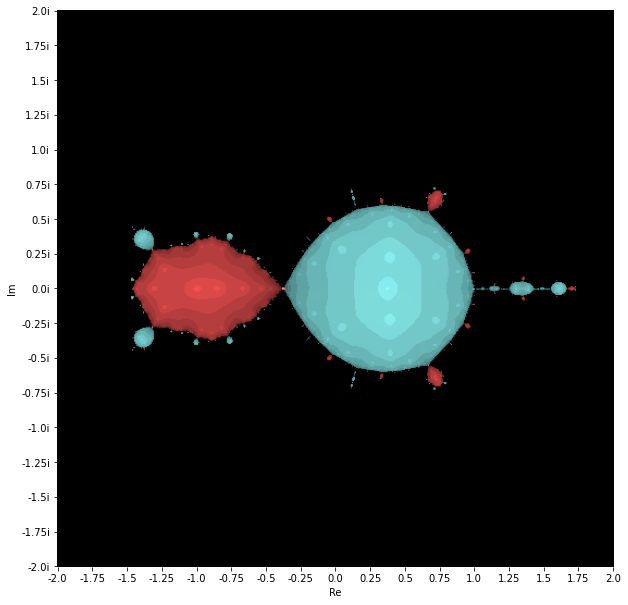

In [7]:
image = np.asarray(img) # converting it to ndarray

dpi = plt.rcParams['figure.dpi'] # get the default dpi value
dpi=50
fig_size = (img.size[0]/dpi, img.size[1]/dpi) # figure size

fig, ax = plt.subplots(1, figsize=fig_size)
ax.imshow(image)

xlen = 2*len(ax.get_xticks())
ylen = 2*len(ax.get_yticks())
xlen += (xlen+1)%2; ylen += (ylen+1)%2
xticks = np.linspace(img_x0,img_x1-1,xlen)
yticks = np.linspace(img_y0,img_y1-1,ylen)
xlabels = np.round(np.linspace(frac_x0,frac_x1,xlen),2)
ylabels = np.round(np.linspace(frac_y1,frac_y0,ylen),2)
ylabels = [str(l)+'i' for l in ylabels]

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlabel("Re")
ax.set_ylabel("Im")

ax.set_frame_on(False)